# Kaggle Titanic Competition
**Outline:** This is the NoteBook on the Titanic Kaggle challenge. This covers a high level EDA, Feature Engineering, Feature Analysis and Model Prediction. This is my first Kaggle Challenge and my first start to finish with machine learning models, prior to this I have had experience with EDA with medical data sets and feature engineering.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

train_df = pd.read_csv(r'F:\Sam Butterfield\Desktop\DataScienceProjects\Data\Titanic\train.csv')
test_df = pd.read_csv(r'F:\Sam Butterfield\Desktop\DataScienceProjects\Data\Titanic\test.csv')

# EDA
## Structure

In [2]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S


## Data Dictionary
- PassengerId: and id that is given to each traveler on the boat
- Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
- The Name of the passenger
- The Sex
- The Age
- SibSp: number of siblings and spouses traveling with the passenger
- Parch: number of parents and children traveling with the passenger
- The ticket number
- The ticket fare
- The cabin number
- The embarkation: location passenger boarded the ship (S, Q, C)

In [3]:
train_df[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [4]:
length = len(train_df)
num_survived = train_df[train_df['Survived'] == 1].count()[0]
num_died = train_df[train_df['Survived'] == 0].count()[0]
num_male = train_df[train_df['Sex'] == 'male'].count()[0]
num_female = train_df[train_df['Sex'] == 'female'].count()[0]
num_1class = train_df[train_df['Pclass'] == 1].count()[0]
num_2class = train_df[train_df['Pclass'] == 2].count()[0]
num_3class = train_df[train_df['Pclass'] == 3].count()[0]

print(f"Length: {length}\nNumber Survived: {num_survived}\nNumber Died: {num_died}\nNumber of Males: {num_male}\nNumber of Females: {num_female}\nNumber of First Class: {num_1class}\nNumber of Second Class: {num_2class}\nNumber of Third Class: {num_3class}")

Length: 891
Number Survived: 342
Number Died: 549
Number of Males: 577
Number of Females: 314
Number of First Class: 216
Number of Second Class: 184
Number of Third Class: 491


## NaN

In [5]:
# Training Set
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Test Set
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Cleaning
**Training** 
- Age
- Cabin
- Embarked

**Test**
- Age
- Fare
- Cabin


**Cleaning Age** To get the most accurate imputation I will engineer the feature 'Title', this feature will extract the title of the individual from the name feature. I will then impute by mean across the 'Title' and 'Sex' features.

In [7]:
from ipynb.fs.full.TitanicFunctions import engineer_title, fill_age
# Engineer Title
train_df = engineer_title(train_df)
test_df = engineer_title(test_df)
# Clean Age
train_df = fill_age(train_df)
test_df = fill_age(test_df)

**Cleaning Fare** In the test set exists 1 missing Fare. There is a large difference in Fare between Classes, but given it is only 1 value I will simply fill by mean for simplification.

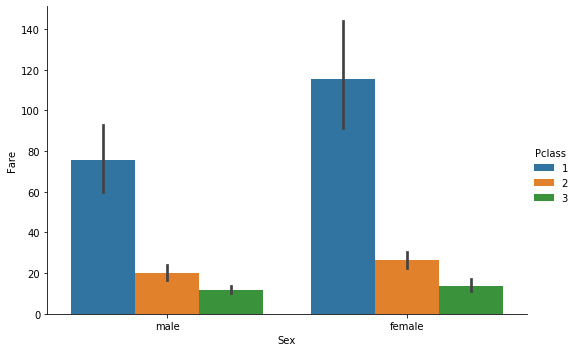

In [8]:
sns.catplot(x = 'Sex', y = 'Fare', hue = 'Pclass', aspect = 1.5, kind = 'bar', data = test_df,)

In [9]:
from ipynb.fs.full.TitanicFunctions import fill_fare
# Clean Fare
test_df = fill_fare(test_df)

**Cleaning Cabin** The starting character defines the location of the cabin within the ship, this is often clearly separated into what Class your ticket is. If there are multiple different Classes within one section you can differentiate this Cabin Location by Fare & Class.
"T" does not appear within the records and I will assume this is an error and group "T" into "A" as they have similar Fares.

I will not try to impute the exact cabin but simply the beginning character, which defines its location, this feature will be called 'CabinLocation'.
<img src="https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733" alt="Titanic Deck & Cabin Layout" title="Titanic Deck & Cabin Layout" />

(<seaborn.axisgrid.FacetGrid at 0x2d21c2d4248>,
 <seaborn.axisgrid.FacetGrid at 0x2d21c2d4248>)

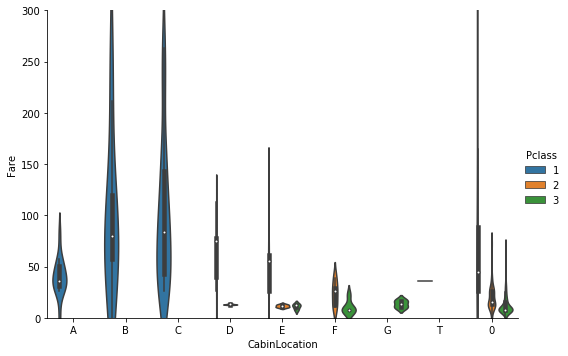

In [10]:
train_df['Cabin'].fillna(0, inplace = True)
train_df['CabinLocation'] = train_df.Cabin.astype(str).str[0]
ax = sns.catplot(x = 'CabinLocation', y = 'Fare', hue = 'Pclass', kind = 'violin', aspect = 1.5,  data = train_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', '0'])
ax.set(ylim = (0,300)), ax

   CabinLocation     Sex  PassengerId
0              0  female          217
1              0    male          470
2              A  female            1
3              A    male           14
4              B  female           27
5              B    male           20
6              C  female           27
7              C    male           32
8              D  female           18
9              D    male           15
10             E  female           15
11             E    male           17
12             F  female            5
13             F    male            8
14             G  female            4
15             T    male            1


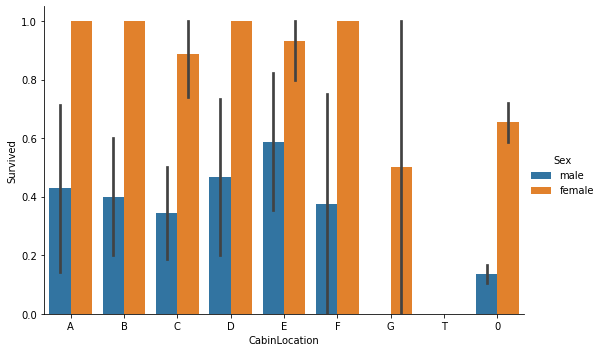

In [11]:
print(train_df.groupby(['CabinLocation', 'Sex']).count().reset_index().iloc[:,:3])
sns.catplot(x = 'CabinLocation', y = 'Survived', hue = 'Sex', aspect = 1.5, kind = 'bar', data = train_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', '0'])

#### Cleaning - CabinLocation - Feature Selection
I will use Random Forest to fill the feature 'CabinLocation'.

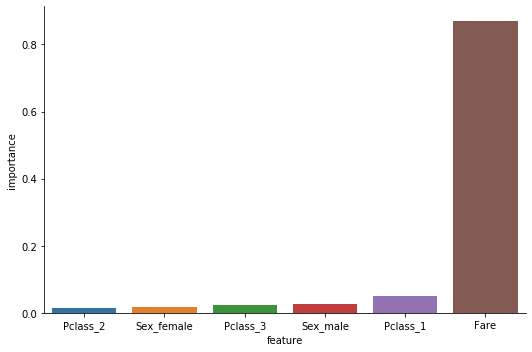

In [12]:
cabin_feature_select = train_df[['PassengerId', 'Pclass', 'Fare', 'Sex', 'CabinLocation']].copy()
cabin_feature_select['CabinLocation'].replace('T', 'A', inplace = True)
cabin_impute_nan = cabin_feature_select[cabin_feature_select['CabinLocation'] == "0"].copy()
cabin_impute_train = cabin_feature_select[cabin_feature_select['CabinLocation'] != "0"].copy()
X_cfs = cabin_impute_train.iloc[:,1:4]
X_cfs = pd.get_dummies(X_cfs, columns = ['Pclass', 'Sex'])
y_cfs = cabin_impute_train.iloc[:,4]

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_cfs, y_cfs)
features = pd.DataFrame()
features['feature'] = X_cfs.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)

sns.catplot(x = 'feature', y = 'importance', aspect = 1.5, kind = 'bar', data = features)

##### Cleaning - CabinLocation - Testing Feature Combination
Cabin Locations, A, B and C are for First Class only. I will test a model with all the cabin locations and then with A, B and C grouped together.

In [13]:
X = cabin_impute_train.iloc[:,1:3]
X = pd.get_dummies(X, columns = ['Pclass'])
y = cabin_impute_train.iloc[:,4]
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features='sqrt')
rf_model = rf_model.fit(X_train, y_train)
# Predict
y_pred = rf_model.predict(X_test)
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Non Grouped")
print(accuracy_score(y_test, y_pred))

Non Grouped
0.6274509803921569


In [14]:
X = cabin_impute_train.iloc[:,1:3]
X = pd.get_dummies(X, columns = ['Pclass'])
y = cabin_impute_train.iloc[:,4]
y.replace(['A', 'B', 'C'], '1', inplace = True)
# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=5, max_features='sqrt')
rf_model = rf_model.fit(X_train, y_train)
# Predict
y_pred = rf_model.predict(X_test)
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Grouped")
print(accuracy_score(y_test, y_pred))

Grouped
0.7647058823529411


In [15]:
from ipynb.fs.full.TitanicFunctions import fill_cabin_location
# Fill Cabin Location
train_df = fill_cabin_location(train_df)
test_df = fill_cabin_location(test_df)

**Cleaning Embarked** There is only 2 individuals that have data missing from 'Embarked', given the majority of peopel embarked at 'S' I will fill missings values with this.

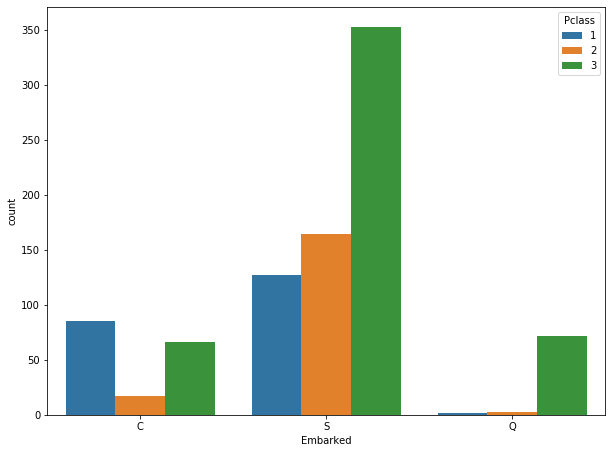

In [16]:
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train_df)

In [17]:
from ipynb.fs.full.TitanicFunctions import fill_embarked
# Fill Embarked
train_df = fill_embarked(train_df)

In [18]:
print("Training Dataset")
print(train_df.isna().sum())
print("Testing Dataset")
print(test_df.isna().sum())

Training Dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
CabinLocation    0
dtype: int64
Testing Dataset
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
CabinLocation    0
dtype: int64


## Additional Feature Engineering
To clean the dataset and fill the NaN values the feeatures Title & CabinLocation. Their are additonal features that can be created/extracted from the original set of features that will provide more usable information.

**FamilyMembers** the features Parch & SibSp can be combined to calcualte how many family members the individual is travelling with.

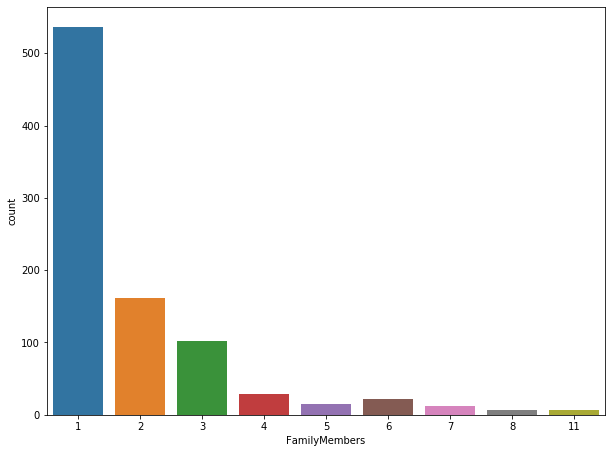

In [19]:
from ipynb.fs.full.TitanicFunctions import engineer_family_members
train_df = engineer_family_members(train_df)
test_df = engineer_family_members(test_df)
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'FamilyMembers', data = train_df)

**FamilyClassification** I can use FamilyMembers to classify the size of family and reduce the possible number of values for this feature. The classification will be 1 = Single, 2-3 = SmallFamily >3 = LargeFamily.

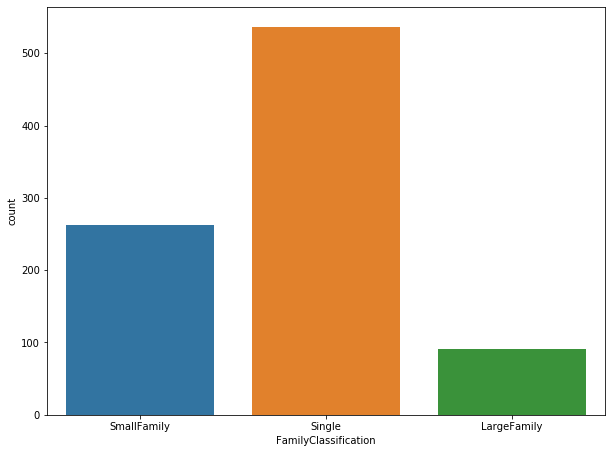

In [20]:
from ipynb.fs.full.TitanicFunctions import engineer_family_classification
train_df = engineer_family_classification(train_df)
test_df = engineer_family_classification(test_df)
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'FamilyClassification', data = train_df)

**AgeCat** I can combine the classifcation of gender and a classification of age group into one feature. <12 = Child, 13-18 = Teenager >18 = Adult.

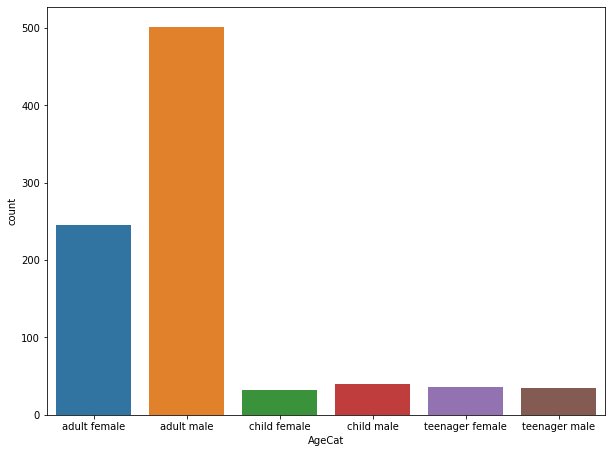

In [21]:
from ipynb.fs.full.TitanicFunctions import engineer_age_cat
train_df = engineer_age_cat(train_df)
test_df = engineer_age_cat(test_df)
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'AgeCat', data = train_df)

In [22]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLocation,FamilyMembers,FamilyClassification,AgeCat
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.000,0,S,Miss.,E,1,Single,adult female
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.000,E101,S,Miss.,E,1,Single,adult female
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.500,B73,S,Miss.,ABC,1,Single,adult female
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.550,0,C,Mr.,ABC,1,Single,adult male
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.775,0,S,Miss.,F,1,Single,adult female


## Model Testing
I will test different models to see which one best suits.
### Setup Pipeline

In [23]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLocation,FamilyMembers,FamilyClassification,AgeCat
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,ABC,2,SmallFamily,adult female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,ABC,2,SmallFamily,adult female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr.,E,1,Single,adult male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,Miss.,G,3,SmallFamily,child female
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,Miss.,ABC,1,Single,adult female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,0,S,Mr.,F,1,Single,adult male
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,0,Q,Mrs.,ABC,6,LargeFamily,adult female
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,S,Rev.,E,1,Single,adult male
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,0,S,Miss.,F,4,LargeFamily,adult female


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

# Split Target y
full_X = train_df.iloc[:,2:]
full_X.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)
y = train_df.iloc[:,1].values
# Preprocessing Pipelines for Both Numeric and Categorical data
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'CabinLocation', 'FamilyClassification', 'AgeCat']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

# Preprocess Data
full_X = preprocessor.fit_transform(full_X)

# Split Datasets
X_train, X_test, y_train, y_test = train_test_split(full_X, y, test_size=0.2)

# Setup Classifiers to Train
# Random Forest
rf_classifier = Pipeline(steps=[
                      ('classifier', RandomForestClassifier())])
rf_sub_classifier = Pipeline(steps=[
                      ('classifier', RandomForestClassifier())])
# Logistic Regression
lg_classifier = Pipeline(steps=[
                      ('classifier', LogisticRegression())])
lg_sub_classifier = Pipeline(steps=[
                      ('classifier', LogisticRegression())])
# XGBoost 
xg_classifier = Pipeline(steps=[
                      ('classifier', XGBClassifier())])
xg_sub_classifier = Pipeline(steps=[
                      ('classifier', XGBClassifier())])

In [25]:
X_train

<712x41 sparse matrix of type '<class 'numpy.float64'>'
	with 6408 stored elements in Compressed Sparse Row format>

### Feature Analysis 
High level feature analysis from a Random Forest model for a high level understanding of how the features impact the model.
#### Setup

In [26]:
rf_classifier.fit(X_train, y_train)

ohe = (preprocessor.named_transformers_['cat']
      .named_steps['onehot'])

feature_names = ohe.get_feature_names(input_features = categorical_features)
feature_names = np.r_[numeric_features, feature_names]

#### Tree feature importance from Mean Decrease in Impurity (MDI)
The impurity-based feature importance ranks the numerical features to be the most important features, this is because impurity-based importances are biased towards high cardinality features.

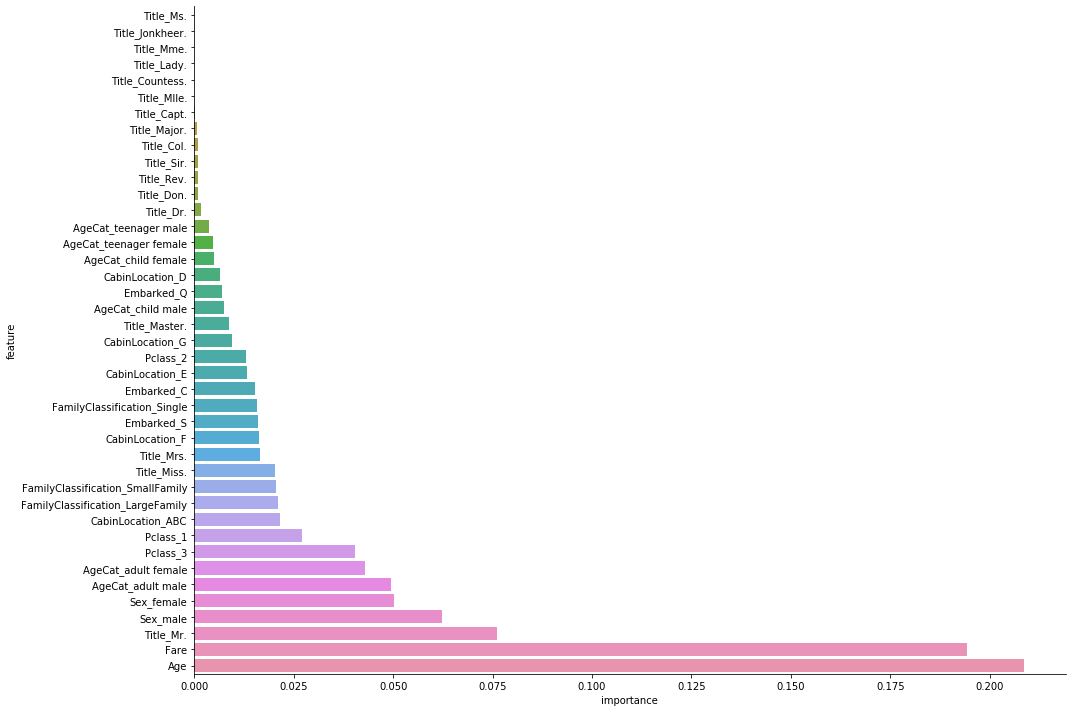

In [27]:
features = pd.DataFrame()
features['feature'] = feature_names
features['importance'] = rf_classifier.named_steps['classifier'].feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)

sns.catplot(y = 'feature', x = 'importance', aspect = 1.5, kind = 'bar', orient = 'h', height = 10, data = features)

#### Permutation Importance
The permutation importance test does not have a bias towards numerical features. It does this by randomly shuffling a single column of the validation data and calculating how it affects the accuracy of the prediction.

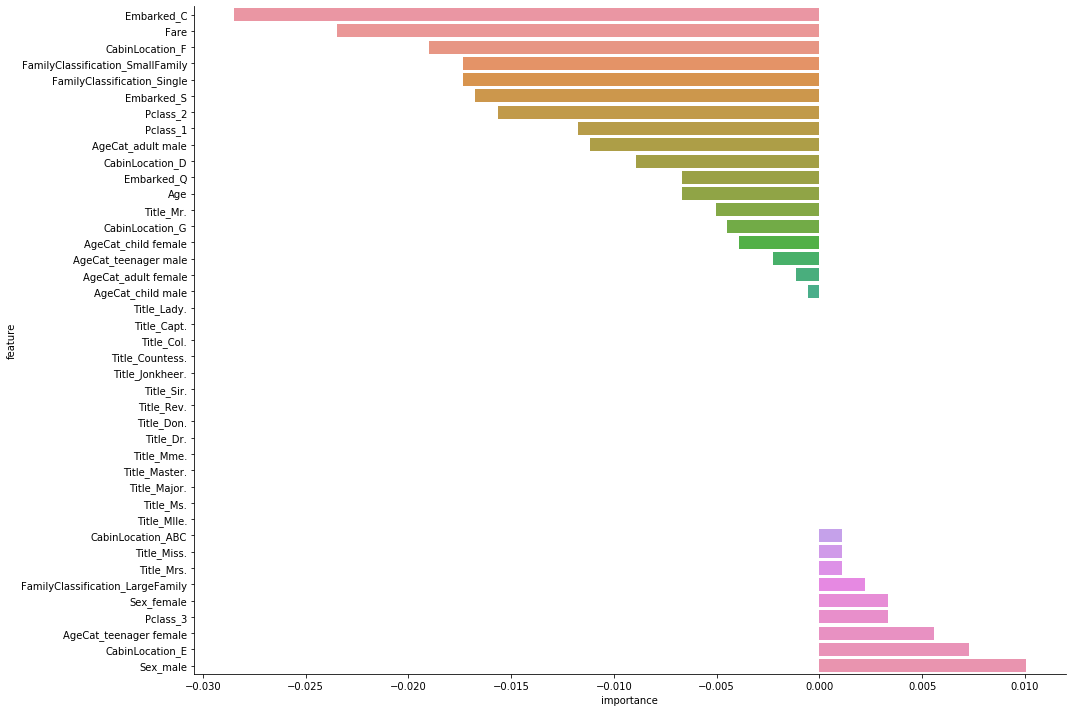

In [28]:
result = permutation_importance(rf_classifier, X_test.toarray(), y_test, n_jobs = 2, n_repeats = 10)

pi_features = pd.DataFrame()
pi_features['feature'] = feature_names
pi_features['importance'] = result.importances_mean
pi_features.sort_values(by=['importance'], ascending=True, inplace=True)

sns.catplot(y = 'feature', x = 'importance', aspect = 1.5, kind = 'bar', orient = 'h', height = 10, data = pi_features)

The permutartion importance shows a clearer picture of features that impact the outcome of the random forest classifier, one point to note is this dataset is small so there could be a large bias in features due to how the train/test split was performed. But I will remove features deemed to be 'polluting' and test the models on a full and subset of featrues.

**Features to remove:**

**Title** - This feature is poliluting the model, I suspect that this may be down to the vast number of different possible Titles among the passengers. Also this feature was engineered to get a more accurate Age imputation.

**Fare** - This feature is consistently negative for permutation importance, this implies that randomly changing these values made the prediction more accurate and the model is not incorporating this feature properly.

**Embarked** - All locations of Embarkement rank low in both tests.

In [29]:
sub_X_train = pd.DataFrame(X_train.toarray(), columns = feature_names).copy()
sub_X_test = pd.DataFrame(X_test.toarray(), columns = feature_names).copy()
cols = [c for c in sub_X_train.columns if ((c.lower()[:5] != 'title') and (c.lower()[:4] != 'fare') and (c.lower()[:8] != 'embarked') and (c.lower()[:5] != 'cabin'))]


sub_X_train = sub_X_train[cols]
sub_X_test = sub_X_test[cols]
sub_X_test

,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,FamilyClassification_LargeFamily,FamilyClassification_Single,FamilyClassification_SmallFamily,AgeCat_adult female,AgeCat_adult male,AgeCat_child female,AgeCat_child male,AgeCat_teenager female,AgeCat_teenager male
0,-0.358227,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.470813,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.197086,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.810431,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.564104,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,-0.282860,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
175,-0.584329,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
176,-1.413369,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
177,-0.508962,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Random Forest

In [30]:
# fit
rf_classifier.fit(X_train, y_train)
rf_sub_classifier.fit(sub_X_train, y_train)
# prediciton
rf_y_pred = rf_classifier.predict(X_test)
rf_sub_y_pred = rf_sub_classifier.predict(sub_X_test)

print("===== Full Set of Features =====")
print("Random Forest: %.3f" % rf_classifier.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(rf_y_pred, y_test))
print("===== Sub Set of Features =====")
print("Random Forest: %.3f" % rf_sub_classifier.score(sub_X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(rf_sub_y_pred, y_test))

===== Full Set of Features =====
Random Forest: 0.782
Confusion Matrix:
[[85 14]
 [25 55]]
===== Sub Set of Features =====
Random Forest: 0.810
Confusion Matrix:
[[90 14]
 [20 55]]


### Logistic Regression

In [31]:
# fit
lg_classifier.fit(X_train, y_train)
lg_sub_classifier.fit(sub_X_train, y_train)
# prediction
lg_y_pred = lg_classifier.predict(X_test)
lg_sub_y_pred = lg_sub_classifier.predict(sub_X_test)

print("===== Full Set of Features =====")
print("Logistic Regression: %.3f" % lg_classifier.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(lg_y_pred, y_test))
print("===== Sub Set of Features =====")
print("Logistic Regression: %.3f" % lg_sub_classifier.score(sub_X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(lg_sub_y_pred, y_test))

===== Full Set of Features =====
Logistic Regression: 0.810
Confusion Matrix:
[[89 13]
 [21 56]]
===== Sub Set of Features =====
Logistic Regression: 0.827
Confusion Matrix:
[[92 13]
 [18 56]]


### XGBoost

In [32]:
# fit
xg_classifier.fit(X_train, y_train)
xg_sub_classifier.fit(sub_X_train, y_train)
# Prediction
xg_y_pred = xg_classifier.predict(X_test)
xg_sub_y_pred =xg_sub_classifier.predict(sub_X_test)
print("===== Full Set of Features =====")
print("XGBoost: %.3f" % xg_classifier.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(xg_y_pred, y_test))
print("===== Sub Set of Features =====")
print("XGBoost: %.3f" % xg_sub_classifier.score(sub_X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(xg_sub_y_pred, y_test))

===== Full Set of Features =====
XGBoost: 0.788
Confusion Matrix:
[[87 15]
 [23 54]]
===== Sub Set of Features =====
XGBoost: 0.777
Confusion Matrix:
[[85 15]
 [25 54]]


In [66]:
###### ROUGH FOR SUBMISSION ######
# Preprocess for 
full_test_set_X = test_df.iloc[:,1:]
full_test_set_X.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)
full_test_set_X = preprocessor.transform(full_test_set_X)

# Refit models with full training set
rf_classifier.fit(full_X, y)
lg_classifier.fit(full_X, y)
xg_classifier.fit(full_X, y)

# Make prediciton dataframes for submission to Kaggle
rf_full_tst_df = pd.DataFrame(data ={'PassengerId':test_df.iloc[:,0], 'Survived': rf_classifier.predict(full_test_set_X)})
lg_full_tst_df = pd.DataFrame(data ={'PassengerId':test_df.iloc[:,0], 'Survived': lg_classifier.predict(full_test_set_X)})
xg_full_tst_df = pd.DataFrame(data ={'PassengerId':test_df.iloc[:,0], 'Survived': xg_classifier.predict(full_test_set_X)})

# Subset of features for the Full Training Set
sub_train = pd.DataFrame(full_X.toarray(), columns = feature_names).copy()
cols = [c for c in sub_test.columns if ((c.lower()[:5] != 'title') and (c.lower()[:4] != 'fare') and (c.lower()[:8] != 'embarked') and (c.lower()[:5] != 'cabin'))]
sub_train = sub_train[cols]

# Retrain models with full dataset with subset of features
rf_classifier.fit(sub_train, y)
lg_classifier.fit(sub_train, y)
xg_classifier.fit(sub_train, y)

# Subset of features for test set
sub_test = pd.DataFrame(full_test_set_X.toarray(), columns = feature_names).copy()
sub_test = sub_test[cols]

# Make prediciton dataframes for submission to Kaggle
rf_sub_tst_df = pd.DataFrame(data ={'PassengerId':test_df.iloc[:,0], 'Survived': rf_classifier.predict(sub_test)})
lg_sub_tst_df = pd.DataFrame(data ={'PassengerId':test_df.iloc[:,0], 'Survived': lg_classifier.predict(sub_test)})
xg_sub_tst_df = pd.DataFrame(data ={'PassengerId':test_df.iloc[:,0], 'Survived': xg_classifier.predict(sub_test)})

In [67]:
rf_full_tst_df.to_csv(r'F:\Sam Butterfield\Desktop\rf_full.csv', index = False)
lg_full_tst_df.to_csv(r'F:\Sam Butterfield\Desktop\lg_full.csv', index = False)
xg_full_tst_df.to_csv(r'F:\Sam Butterfield\Desktop\xg_full.csv', index = False)
rf_sub_tst_df.to_csv(r'F:\Sam Butterfield\Desktop\rf_sub.csv', index = False)
lg_sub_tst_df.to_csv(r'F:\Sam Butterfield\Desktop\lg_sub.csv', index = False)
xg_sub_tst_df.to_csv(r'F:\Sam Butterfield\Desktop\xg_sub.csv', index = False)

# Kaggle Scores
## Full Set of Features
**Random Forest** - 0.76794

**Logistic Regression** - 0.76794

**XGBoost** - 0.75119

## Sub Set of Features
**Random Forest** - 0.73444

**Logistic Regression** - 0.77511

**XGBoost** - 0.74641
